# Regression on diamond dataset

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [32]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Regression: explaining price with carat

In [33]:
# Select variables 
X = df[['carat']]
y = df['price']

In [34]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [7768.91049036]


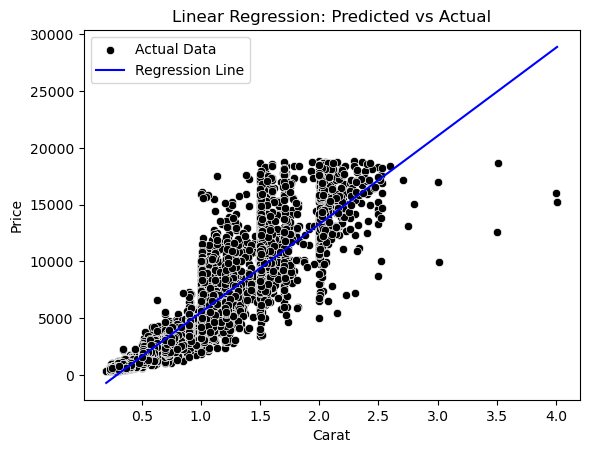

In [36]:
# Scatter plot of the test data
sns.scatterplot(x=X_test['carat'], y=y_test, color="black", label="Actual Data")

# Regression line based on predictions
sns.lineplot(x=X_test['carat'], y=y_pred, color="blue", label="Regression Line")

# Add labels and a title
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Linear Regression: Predicted vs Actual")
plt.legend()

# Show the plot
plt.show()

In [37]:
# Mean Absolute Error
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred) 

# Mean Squared Error
rmse = root_mean_squared_error(y_true = y_test,
                               y_pred = y_pred) 

# Mean Absolute Error %
dumb_mape = mean_absolute_percentage_error(y_true = y_test,
                                           y_pred = y_pred) 

# Rsquared
r2 = r2_score(y_true = y_test, y_pred = y_pred) 

## Regression: explaining price with all numerical variables

In [39]:
#1.Selecting only numeric columns
numeric_cols = df.select_dtypes(include='number')

#2. Selecting predictors and target variable
## In this case considering all the columns
X =numeric_cols.drop(columns='price')  # Drop the target column
y = numeric_cols['price']

#3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#4. Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize numeric variables
    ('regressor', LinearRegression()) 
])

#5. Train the pipeline
pipeline.fit(X_train, y_train)

#6: Make predictions
y_pred = pipeline.predict(X_test)

In [40]:
# Mean Absolute Error
mae_1 = mean_absolute_error(y_true = y_test, y_pred = y_pred) 

# Mean Squared Error
rmse_1 = root_mean_squared_error(y_true = y_test,
                               y_pred = y_pred) 

# Mean Absolute Error %
dumb_mape_1 = mean_absolute_percentage_error(y_true = y_test,
                                           y_pred = y_pred) 

# Rsquared
r2_1 = r2_score(y_true = y_test, y_pred = y_pred) 

## Model evaluation and comparison

In [41]:
# Create a DataFrame for the table
metrics_table = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", 
               "Root Mean Squared Error (RMSE)", 
               "Mean Absolute Percentage Error (MAPE)", 
               "R-squared (R²)"],
    "Carat": [mae, rmse, dumb_mape, r2],
    "Full model": [mae_1, rmse_1, dumb_mape_1, r2_1]
})

# Display the table
metrics_table

,Metric,Carat,Full model
0,Mean Absolute Error (MAE),1009.504742,888.480863
1,Root Mean Squared Error (RMSE),1549.641460,1497.390699
2,Mean Absolute Percentage Error (MAPE),0.389251,0.283362
3,R-squared (R²),0.848939,0.858954
